#Parcial #4, Metodos Computacionales#
****
**Realizado por:** Juan Sebastian Pabon Martinez y Karen Polo

**Demostración de la segunda ley de newton como modelo de ecuaciondes diferenciales:**

Partimos de las sigueintes relaciones 

$$
\begin{equation}
\sum \vec{F} = m(\vec{a}+2\vec{\omega}\times\vec{v})\\
\vec{w}=|-\omega cosλ,0,\omega sin\lambda| \\
\vec{r}=|rcos\theta,rsin\theta,r|\\
\omega r=v
\end{equation}
$$

Por ello podemos calcular $\vec{v}$ sabiendo que $\vec{\omega} \times \vec{r}=\vec{v}$

$$
\begin{equation}
\begin{split}
\vec{v}&=\vec{\omega} \times \vec{r}\\
&=\begin{pmatrix}{-\omega rsin\theta sin\lambda}\\{\omega rcos\lambda} \\{-\omega rsin\theta cos\lambda} \end{pmatrix}
\end{split}
\end{equation}
$$

Con ello podemos plantear la siguente ecuaciones:

$$
\begin{equation}
-m \begin{pmatrix}{0}\\{0} \\{g} \end{pmatrix}=m \Big(\begin{pmatrix}{\ddot{x}}\\{\ddot{y}} \\{\ddot{z}} \end{pmatrix} +2\begin{pmatrix}{-\omega cosλ}\\{0} \\{\omega sin\lambda} \end{pmatrix} \times \begin{pmatrix}{-\omega rsin\theta sin\lambda}\\{\omega rcos\lambda} \\{-\omega rsin\theta cos\lambda} \end{pmatrix} \Big)\\
-\begin{pmatrix}{0}\\{0} \\{g} \end{pmatrix}=\begin{pmatrix}{\ddot{x}}\\{\ddot{y}} \\{\ddot{z}} \end{pmatrix} +2\begin{pmatrix}{-\omega^2r sin\lambda cosλ}\\{\omega^2 rsin^2\lambda sin\theta+\omega^2 rcos^2\lambda cos\theta} \\{-\omega^2r cos^2\lambda} \end{pmatrix} 
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones: 

$$
\begin{equation}
\ddot{x}=2\omega^2r sin\lambda cosλ\\
\ddot{y}=-2\omega^2 rsin^2\lambda sin\theta -2\omega^2 
rcos^2\lambda cos\theta\\
\ddot{z}=-g+2\omega^2r cos^2\lambda\\
\end{equation}
$$

y en base al vector velocidad econtrado anteriormente tenemos que:

$$
\begin{equation}
\dot{x}=\omega rsin\theta sin\lambda\\
\dot{y}=\omega rcos\lambda\\
\dot{z}=\omega rsin\theta cos\lambda
\end{equation}
$$

Por tanto estableciedo las relaciones entre los sistema, quedan las siguientes ecuaciones:
\begin{equation}
\ddot{x}=2\omega r sin\lambda \dot{y} \\
\ddot{y}=-2\omega rsin\lambda \dot{x} -2\omega 
rcos\lambda \dot{z}\\
\ddot{z}=-g+2\omega r cos\lambda \dot{y}\\
\end{equation}

que son presisamente las ecuaciones que descirben la segunda ley de newton 








In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as spo

#**Parte 1: Ajuste lineal del modelo**

In [207]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'
Data = pd.read_csv(url)

In [223]:

def filter(data,angles):
  return data[data.angle == angles]

data=filter(Data,30)
data

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


In [224]:
def coriolis(h,lamda,p,g):
  one= np.sqrt(2)*2*(1/3)
  two=p*np.cos(np.deg2rad(lamda))
  three= np.sqrt(h**3/g)
  y=one*two*three
  return y

In [225]:
def Chi2(p,h,y,sigmay,lambda_,g):
    return np.sum ( (y-coriolis(h,lambda_,p,g))**2/(2*sigmay**2) )


In [226]:
h=data.h
y= data.y
sigma= data.sigmay

In [227]:
p=np.ones(1)
nll = lambda *p: Chi2(*p)

resultado = spo.minimize( nll, p, args=(h,y,sigma,30,9.81),options={'disp':True} )

Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


In [228]:
omega= resultado.x
print("El valor mejor aproximado para omega es: {}".format(omega))

El valor mejor aproximado para omega es: [7.24399804e-05]


Text(0, 0.5, 'y')

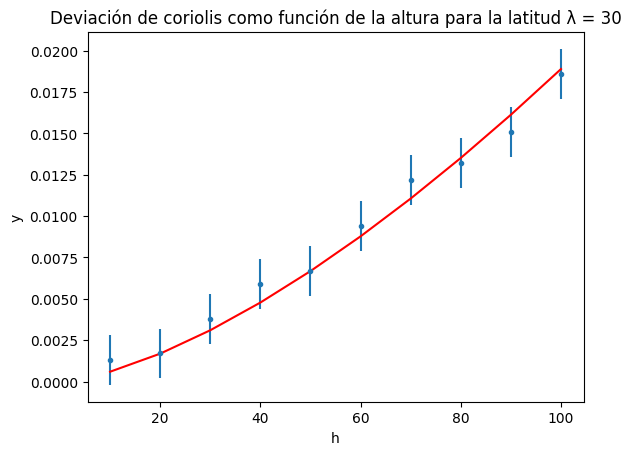

In [229]:
modelo= coriolis(h,30,omega,9.81)
plt.errorbar(h,y,sigma,fmt='.')
plt.plot(h,modelo,color='r')
plt.title('Deviación de coriolis como función de la altura para la latitud λ = 30')
plt.xlabel('h')
plt.ylabel('y')

#**Propagación de la incertidumbre de la aceleración de la gravedad:**

In [294]:
y = np.array(data.y)
h =  np.array(data.h)
sigmay = np.array(data.sigmay)

In [295]:

def Estimacion(y, h, sigmay,lambda_):
  Gravity= np.zeros(300)
  Omega=np.zeros(300)
  for i in range(300):
    G = 9.81 + np.random.normal(loc=0,scale=1)
    Gravity[i]= G
    y_modified = y + np.random.normal(loc=0,scale=sigmay[0],size=len(y))
    result_ = spo.minimize(nll,p, args=(h,y_modified,sigmay,lambda_,G),options={'disp':True})
    Omega[i]= result_.x

  return Omega,Gravity


In [296]:
def Continue_Distribution (Omega,Gravity):
  gridy = np.linspace(min(Gravity),max(Gravity),30)
  gridx = np.linspace(min(Omega),max(Omega),30)
  H2, binsx, binsy = np.histogram2d(Omega,Gravity,bins=(gridx,gridy))
  return H2, binsx, binsy 


In [301]:
Omega_30,Gravity_30= Estimacion(y, h, sigmay,30)
H2_30,binsx_30,binsy_30=Continue_Distribution(Omega_30,Gravity_30)

         Current function value: 7.410176
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 10.186959
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 5.502700
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 9.500939
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.642104
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.126493
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 8.217743
         Iterat

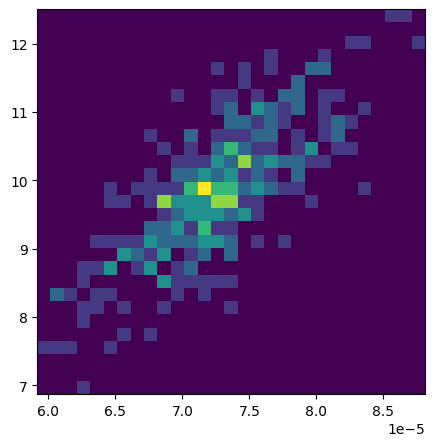

In [302]:
fig= plt.figure(figsize=(5,5))
plt.imshow(H2_30.T, origin='lower', extent=[binsx_30[0], binsx_30[-1], binsy_30[0], binsy_30[-1]], aspect='auto')

In [311]:
np.cov(binsx_30.T)

array(7.6984246e-11)

g) Como podemos ver la covarianza entre las variables(Omega y la Gravedad) no es 0. Por ello, podemos afirmar que se preseta una correlación entre ellas. De igual forma, sin la covarianza, nos podemos dar cuenta que ambas variables parece seguir una dependendedcia lineal, lo que como conclusión nos lleva a decir que no son linealmente independientes

In [303]:
#h
H1 = np.sum(H2_30,axis=1)
H1

array([ 1.,  3.,  2.,  5.,  4.,  8.,  7.,  5., 14., 19., 18., 23., 27.,
       28., 33., 19., 18., 15.,  8., 13.,  7.,  8.,  6.,  3.,  3.,  0.,
        1.,  1.,  1.])

In [304]:
#i
def trust_interval (H2,binsx):
  H1 = np.sum(H2,axis=1)
  cs = np.cumsum(H1)
  ij = np.searchsorted( cs, np.percentile(cs,16) )
  ii = np.searchsorted( cs, np.percentile(cs,50) )
  ji = np.searchsorted( cs, np.percentile(cs,84) )
  best_omega= binsx[ii]
  upper_limit= binsx[ji]
  lower_limit= binsx[ij]
  return best_omega,lower_limit,upper_limit

best_omega,lower_limit,upper_limit= trust_interval(H2_30,binsx_30)

print("El mejor estimados para omega en lambda= 30 es: {}".format(best_omega))
print("El intervalo de confianza al 68% para lambda = 30 es {} y {}".format(lower_limit,upper_limit))

El mejor estimados para omega en lambda= 30 es: 7.314418172779507e-05
El intervalo de confianza al 68% para lambda = 30 es 6.417417872289484e-05 y 8.311085173323977e-05


Calculamos la mejor estimación de ω para cada latitud

In [311]:
best_omegas=[]
errors=[]
for i in range(1,7):
  n_data=filter(Data,i*10)
  y = np.array(n_data.y)
  h =  np.array(n_data.h)
  sigmay = np.array(n_data.sigmay)
  Omega_n,Gravity_n= Estimacion(y, h, sigmay, i*10)
  H2_n,binsx_n,binsy_n=Continue_Distribution(Omega_n,Gravity_n)
  best_omega,lower_limit,upper_limit= trust_interval(H2_n,binsx_n)
  best_omegas.append(best_omega)
  errors.append(np.abs((upper_limit - lower_limit)/2))


In [306]:
best_omegas

[6.925986706461453e-05,
 7.087285966923735e-05,
 7.324304862531882e-05,
 7.37416806655251e-05,
 6.576385205870205e-05,
 7.438639675643153e-05]

In [308]:
combined= np.mean(best_omegas)
combined

7.121128413997157e-05

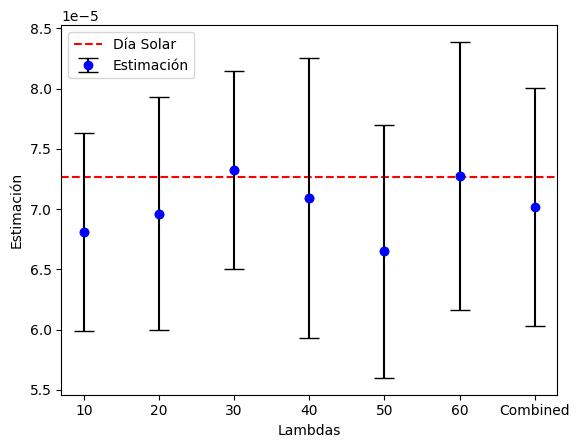

In [283]:
angles=[10,20,30,40,50,60]
plt.scatter(angles,best_omegas)
plt.axhline(7.27e-5, linestyle = 'dashed', color = 'r', label="Día Solar")
for i in range(len(best_omegas)):
  ax = plt.errorbar(angles[i], best_omegas[i], linestyle="None", yerr = errors[i], fmt="ob", capsize=7, ecolor="k")
plt.errorbar(70, combined, linestyle="None", yerr = np.sum(errors)/len(errors), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(angles + [70],["10", "20", "30", "40", "50", "60", "Combined"])
plt.xlabel('Lambdas')
plt.ylabel('Estimación')
plt.legend()